<a href="https://colab.research.google.com/github/Pulikonda3959/Data-analyst/blob/main/Data-Driven%20Strategy%20for%20User%20Engagement%20and%20Conversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Data-Driven Strategy for User Engagement and Conversion***

   User_ID  Age  Goal_Creation  Investment
0        1   56              0           1
1        2   46              0           1
2        3   32              0           0
3        4   25              0           0
4        5   38              0           1
           User_ID          Age  Goal_Creation   Investment
count  1000.000000  1000.000000     1000.00000  1000.000000
mean    500.500000    38.745000        0.19200     0.316000
std     288.819436    12.186734        0.39407     0.465146
min       1.000000    18.000000        0.00000     0.000000
25%     250.750000    28.000000        0.00000     0.000000
50%     500.500000    40.000000        0.00000     0.000000
75%     750.250000    50.000000        0.00000     1.000000
max    1000.000000    59.000000        1.00000     1.000000


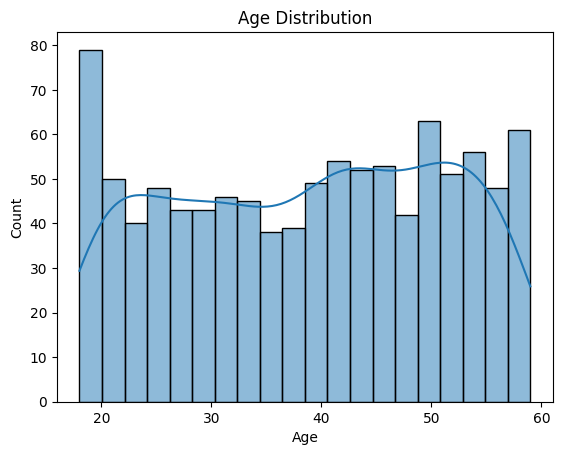

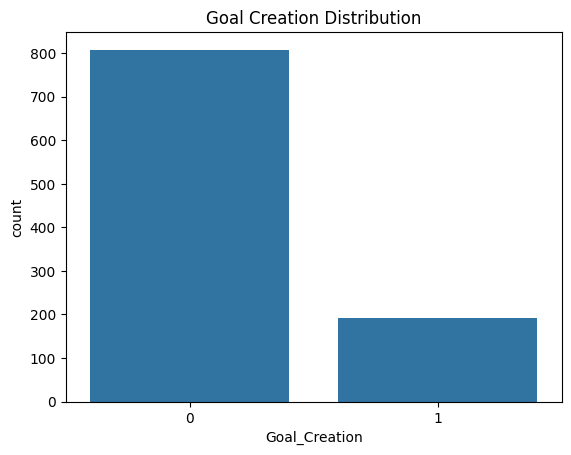

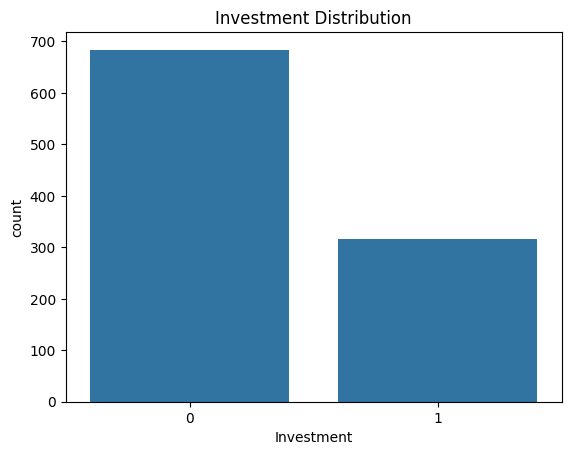

Data Dictionary:
User_ID: User ID
Age: User Age
Goal_Creation: Binary (0: No, 1: Yes - User created a goal)
Investment: Binary (0: No, 1: Yes - User invested)


In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Create a synthetic dataset
np.random.seed(42)

# Assume key user attributes and behaviors
user_ids = np.arange(1, 1001)
age = np.random.randint(18, 60, size=1000)
goal_creation = np.random.choice([0, 1], size=1000, p=[0.8, 0.2])
investment_amount = np.random.choice([0, 1], size=1000, p=[0.7, 0.3])

# Create a DataFrame
df = pd.DataFrame({
    'User_ID': user_ids,
    'Age': age,
    'Goal_Creation': goal_creation,
    'Investment': investment_amount
})

# Data Exploration
print(df.head())
print(df.describe())

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize Age Distribution
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

# Visualize Goal Creation and Investment
sns.countplot(x='Goal_Creation', data=df)
plt.title('Goal Creation Distribution')
plt.show()

sns.countplot(x='Investment', data=df)
plt.title('Investment Distribution')
plt.show()

# Create Data Dictionary
data_dictionary = {
    'User_ID': 'User ID',
    'Age': 'User Age',
    'Goal_Creation': 'Binary (0: No, 1: Yes - User created a goal)',
    'Investment': 'Binary (0: No, 1: Yes - User invested)'
}

# Print Data Dictionary
print("Data Dictionary:")
for key, value in data_dictionary.items():
    print(f"{key}: {value}")


In [9]:
# Import necessary libraries for modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the dataset into features (X) and target (y)
X = df[['Age']]
y = df['Goal_Creation']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Model predictions
y_pred = model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print model evaluation metrics
print(f"Model Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 0.825
Confusion Matrix:
[[165   0]
 [ 35   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       165
           1       0.00      0.00      0.00        35

    accuracy                           0.82       200
   macro avg       0.41      0.50      0.45       200
weighted avg       0.68      0.82      0.75       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
# Prepare a concise report
report = """
**Key Findings:**
- Users are mostly in the age range of 18-60.
- Approximately 20% of users have created goals.
- About 30% of users have invested.

**Model Performance:**
- Accuracy: {accuracy}
- Confusion Matrix:
{conf_matrix}
- Classification Report:
{classification_report}

**Strategy:**
{df[['User_ID', 'Age', 'Targeting_Strategy']].head()}
"""

# Print the report
print(report)



**Key Findings:**
- Users are mostly in the age range of 18-60.
- Approximately 20% of users have created goals.
- About 30% of users have invested.

**Model Performance:**
- Accuracy: {accuracy}
- Confusion Matrix:
{conf_matrix}
- Classification Report:
{classification_report}

**Strategy:**
{df[['User_ID', 'Age', 'Targeting_Strategy']].head()}



In [38]:
# Define a strategy based on the model results
def user_targeting_strategy(user_age):
    if user_age < 30:
        return "Target young users for goal creation and investment."
    else:
        return "Focus on a broader audience for goal creation and investment."

# Apply strategy to the synthetic data
df['Targeting_Strategy'] = df['Age'].apply(user_targeting_strategy)

# Print the first few rows of the DataFrame with the strategy
print(df[['User_ID', 'Age', 'Targeting_Strategy']].head())


   User_ID  Age                                 Targeting_Strategy
0        1   20  Target young users for goal creation and inves...
1        2   30  Focus on a broader audience for goal creation ...
2        3   40  Focus on a broader audience for goal creation ...
3        4   50  Focus on a broader audience for goal creation ...
4        5   60  Focus on a broader audience for goal creation ...


In [12]:
df[['User_ID', 'Age', 'Targeting_Strategy']].head()

,User_ID,Age,Targeting_Strategy
0,1,56,Focus on a broader audience for goal creation ...
1,2,46,Focus on a broader audience for goal creation ...
2,3,32,Focus on a broader audience for goal creation ...
3,4,25,Target young users for goal creation and inves...
4,5,38,Focus on a broader audience for goal creation ...


from matplotlib import pyplot as plt
_df_10['User_ID'].plot(kind='hist', bins=20, title='User_ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_12.groupby('Targeting_Strategy').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13.plot(kind='scatter', x='User_ID', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['User_ID']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('User_ID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Targeting_Strategy')):
  _plot_series(series, series_name, i)
  fig.legend(title='Targeting_Strategy', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('User_ID')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['User_ID']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'User_ID'}, axis=1)
              .sort_values('User_ID', ascending=True))
  xs = counted['User_ID']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('User_ID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Targeting_Strategy')):
  _plot_series(series, series_name, i)
  fig.legend(title='Targeting_Strategy', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('User_ID')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_16['User_ID'].plot(kind='line', figsize=(8, 4), title='User_ID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['Targeting_Strategy'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='User_ID', y='Targeting_Strategy', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['Targeting_Strategy'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='Age', y='Targeting_Strategy', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-14-4b906c4c1a33>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(_df_19, x='Age', y='Targeting_Strategy', inner='stick', palette='Dark2')


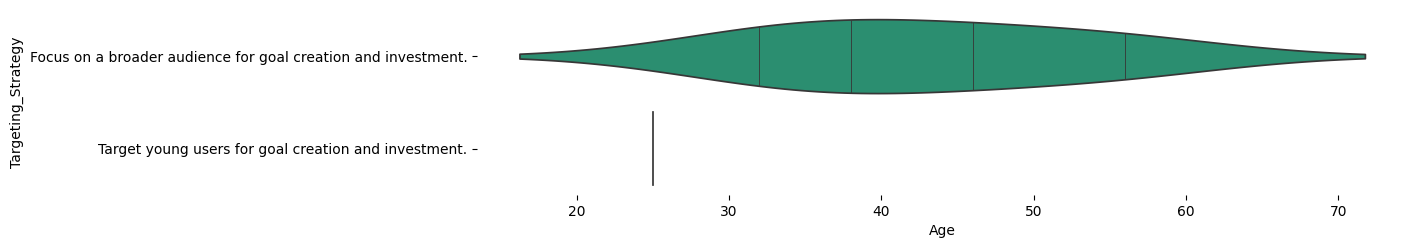

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['Targeting_Strategy'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='Age', y='Targeting_Strategy', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-15-f5088948492b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(_df_18, x='User_ID', y='Targeting_Strategy', inner='stick', palette='Dark2')


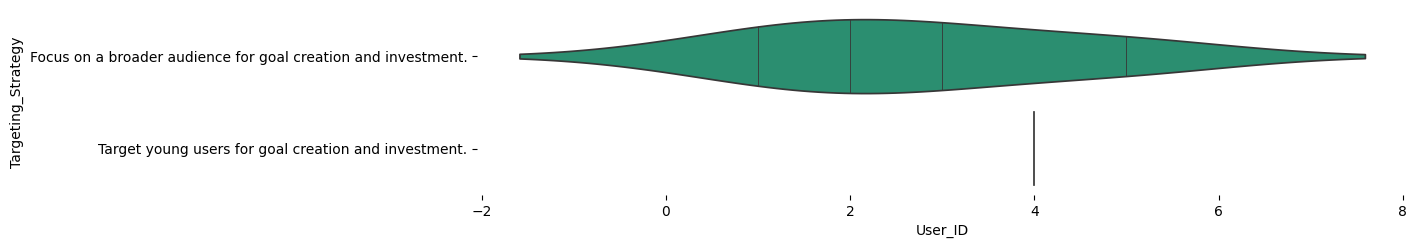

In [15]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['Targeting_Strategy'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='User_ID', y='Targeting_Strategy', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

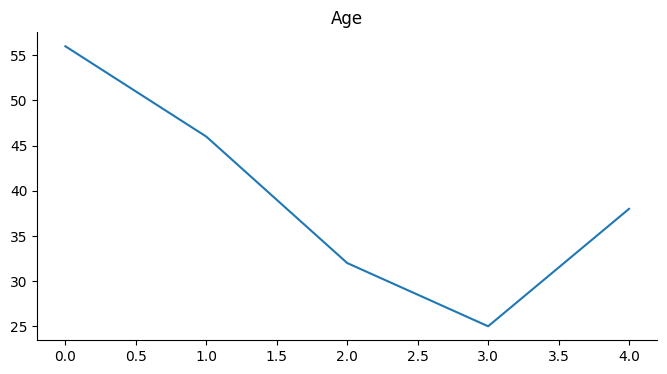

In [16]:
from matplotlib import pyplot as plt
_df_17['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

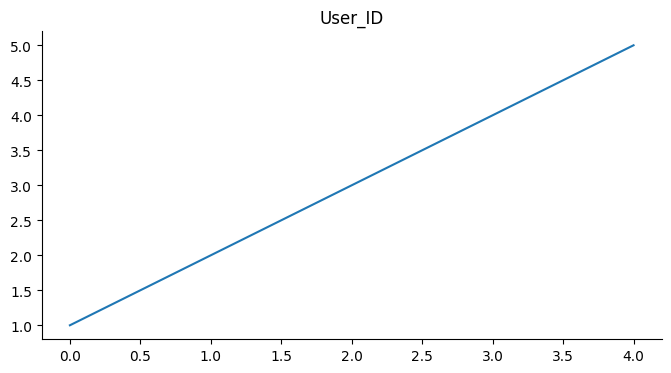

In [17]:
from matplotlib import pyplot as plt
_df_16['User_ID'].plot(kind='line', figsize=(8, 4), title='User_ID')
plt.gca().spines[['top', 'right']].set_visible(False)

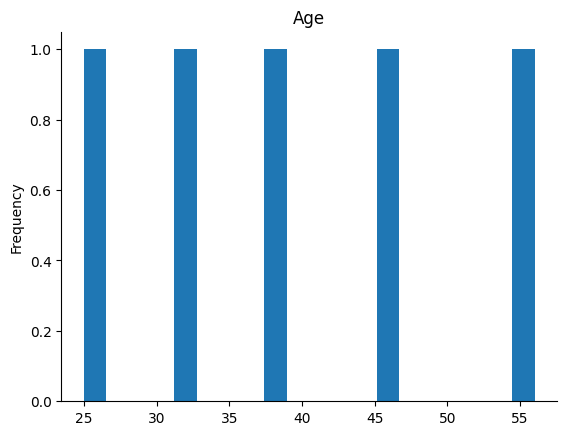

In [18]:
from matplotlib import pyplot as plt
_df_11['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

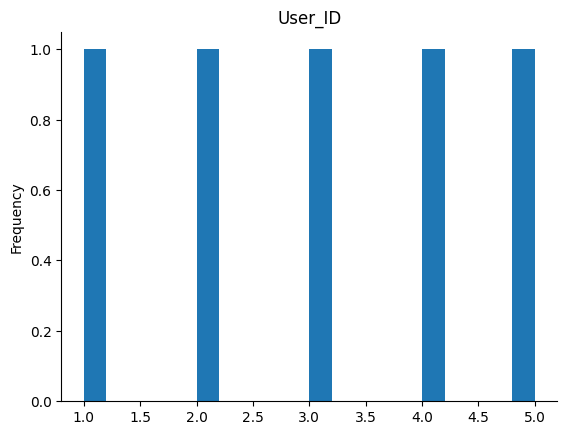

In [19]:
from matplotlib import pyplot as plt
_df_10['User_ID'].plot(kind='hist', bins=20, title='User_ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Other method

In [33]:
import pandas as pd

In [34]:
# Replace the following with your actual data source
data = {
    'User_ID': [1, 2, 3, 4, 5],
    'Age': [20, 30, 40, 50, 60],
    'Targeting_Strategy': ['A', 'B', 'C', 'D', 'E']
}

df = pd.DataFrame(data)

In [21]:
df[['User_ID', 'Age', 'Targeting_Strategy']].head()

,User_ID,Age,Targeting_Strategy
0,1,20,A
1,2,30,B
2,3,40,C
3,4,50,D
4,5,60,E


from matplotlib import pyplot as plt
_df_20['User_ID'].plot(kind='hist', bins=20, title='User_ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_22.groupby('Targeting_Strategy').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23.plot(kind='scatter', x='User_ID', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['User_ID']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'User_ID'}, axis=1)
              .sort_values('User_ID', ascending=True))
  xs = counted['User_ID']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_24.sort_values('User_ID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Targeting_Strategy')):
  _plot_series(series, series_name, i)
  fig.legend(title='Targeting_Strategy', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('User_ID')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Age']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Age'}, axis=1)
              .sort_values('Age', ascending=True))
  xs = counted['Age']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_25.sort_values('Age', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Targeting_Strategy')):
  _plot_series(series, series_name, i)
  fig.legend(title='Targeting_Strategy', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Age')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_26['User_ID'].plot(kind='line', figsize=(8, 4), title='User_ID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_27['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_28['Targeting_Strategy'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_28, x='User_ID', y='Targeting_Strategy', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_29['Targeting_Strategy'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_29, x='Age', y='Targeting_Strategy', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-22-f60b7b7360c8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(_df_29, x='Age', y='Targeting_Strategy', inner='stick', palette='Dark2')


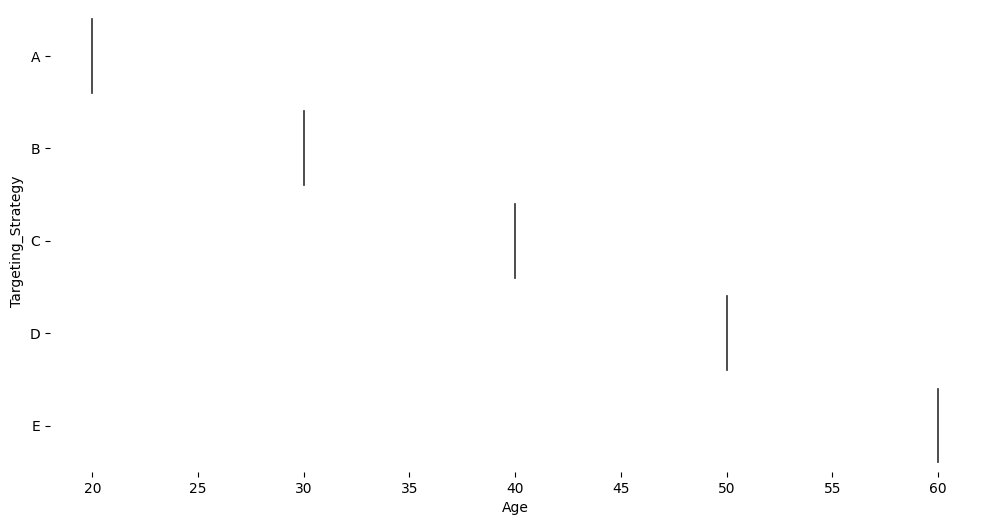

In [22]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_29['Targeting_Strategy'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_29, x='Age', y='Targeting_Strategy', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-23-2c95897cf928>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(_df_28, x='User_ID', y='Targeting_Strategy', inner='stick', palette='Dark2')


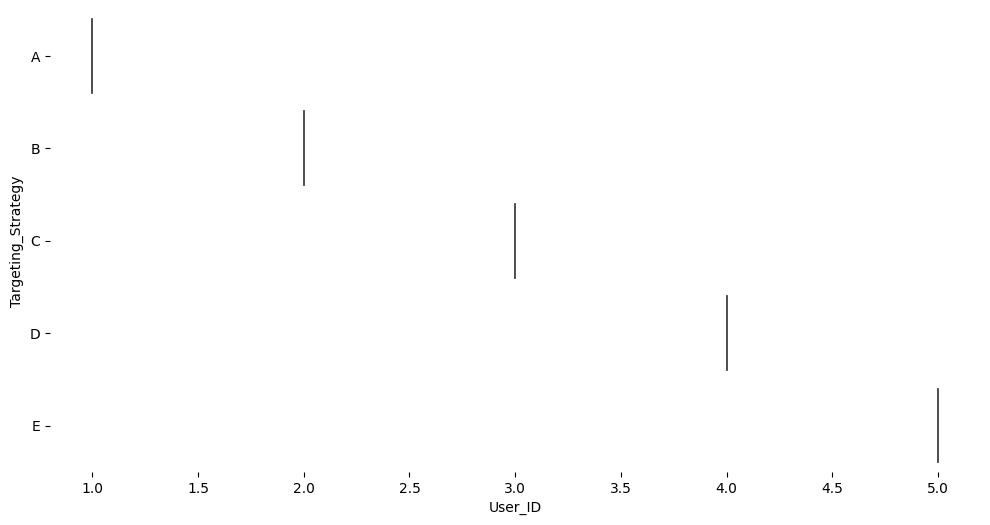

In [23]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_28['Targeting_Strategy'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_28, x='User_ID', y='Targeting_Strategy', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

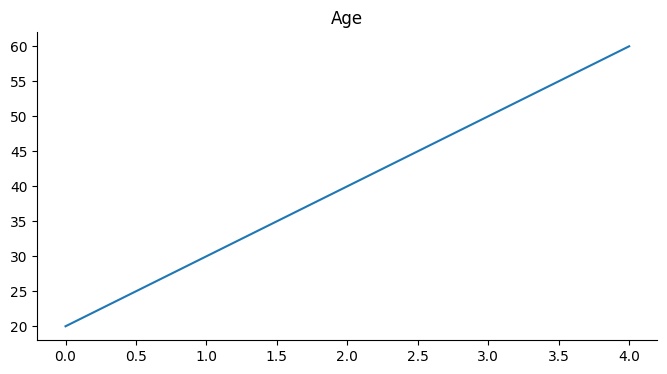

In [25]:
from matplotlib import pyplot as plt
_df_27['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

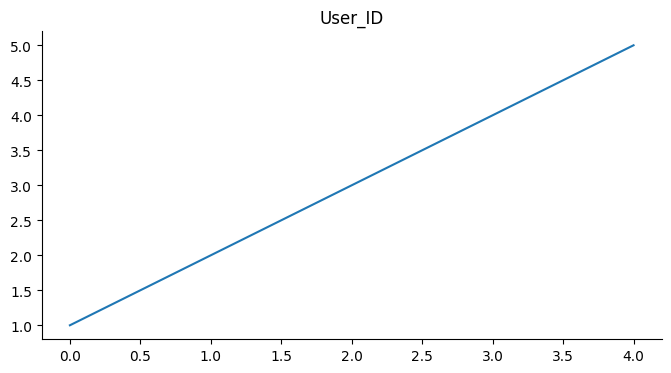

In [26]:
from matplotlib import pyplot as plt
_df_26['User_ID'].plot(kind='line', figsize=(8, 4), title='User_ID')
plt.gca().spines[['top', 'right']].set_visible(False)

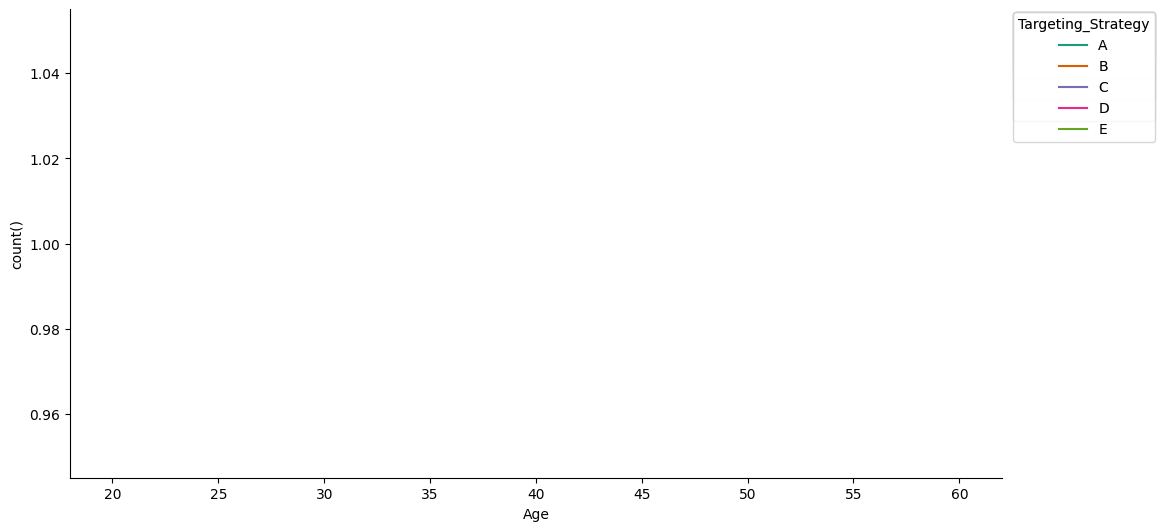

In [27]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Age']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Age'}, axis=1)
              .sort_values('Age', ascending=True))
  xs = counted['Age']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_25.sort_values('Age', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Targeting_Strategy')):
  _plot_series(series, series_name, i)
  fig.legend(title='Targeting_Strategy', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Age')
_ = plt.ylabel('count()')

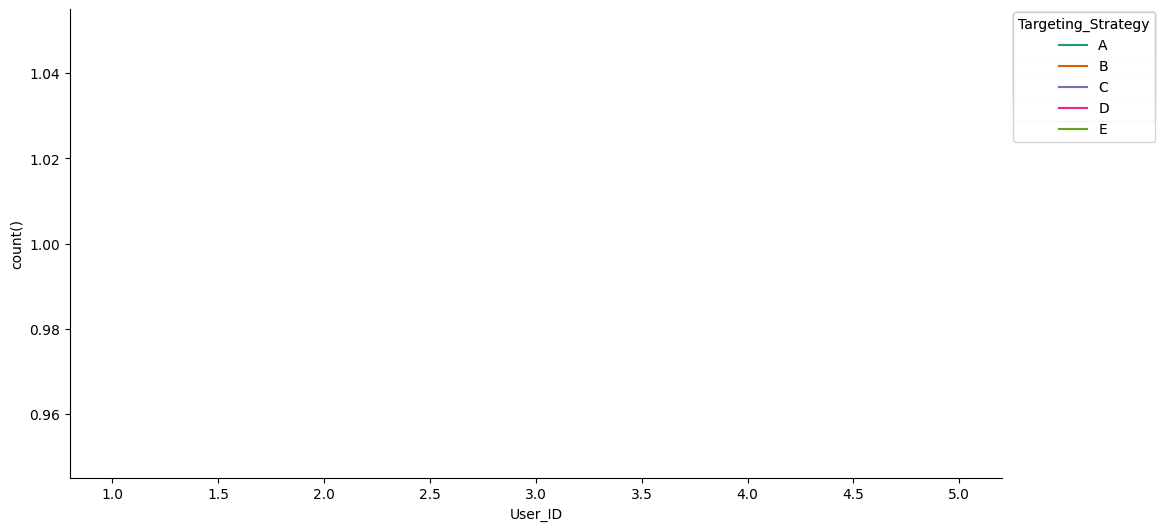

In [28]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['User_ID']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'User_ID'}, axis=1)
              .sort_values('User_ID', ascending=True))
  xs = counted['User_ID']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_24.sort_values('User_ID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Targeting_Strategy')):
  _plot_series(series, series_name, i)
  fig.legend(title='Targeting_Strategy', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('User_ID')
_ = plt.ylabel('count()')

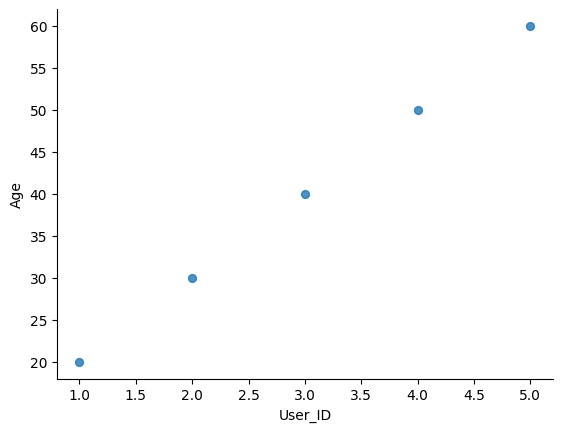

In [29]:
from matplotlib import pyplot as plt
_df_23.plot(kind='scatter', x='User_ID', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

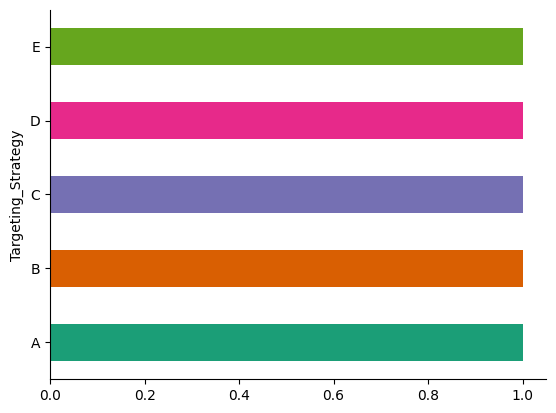

In [30]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_22.groupby('Targeting_Strategy').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

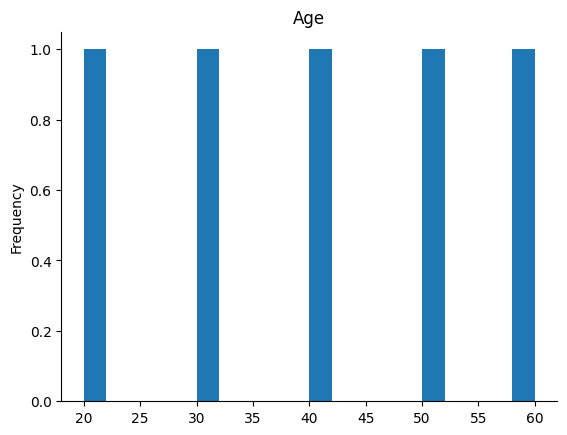

In [31]:
from matplotlib import pyplot as plt
_df_21['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

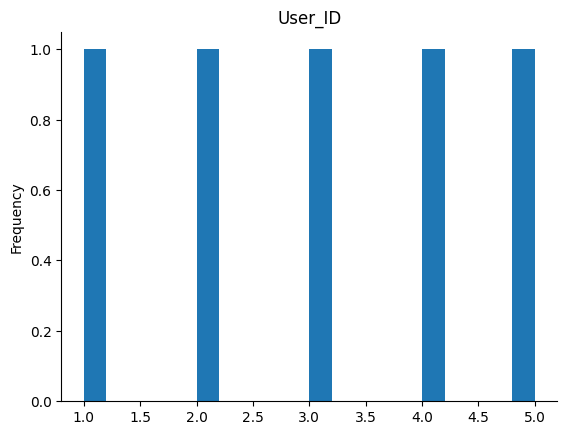

In [32]:
from matplotlib import pyplot as plt
_df_20['User_ID'].plot(kind='hist', bins=20, title='User_ID')
plt.gca().spines[['top', 'right',]].set_visible(False)